![UofC](header.png)

<center>
    <h1>Project </h1>
    <h3>Tien Dat Johny Do - 30087967</h3>
    <h4></h4>
</center>

    

### Imports

In [245]:
#Some neccessary libraries/imports we will be needed
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure
import scipy.linalg as la

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

#Taken from the d2l utils within lab 6
from utils_cm import plot_confusion_matrix

import matplotlib as mpl
%matplotlib inline
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb

In [246]:
#Since we have a face database within the ATT D2L I have used
#this dataset
path = './ATT dataset/s1/'

### Local Binary Pattern Procedure

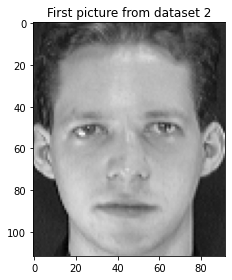

In [247]:
#We have to read one image of subject 2 from the dataset
img = imread("ATT dataset/s1/1.pgm", as_gray=True)
#Paramters for local binary pattern (img, circular symmetry, radius)
#P:is the number of circularly symmetric neighbors set points 
#Q: Radius of circle
lbp1 = local_binary_pattern(img,12,3)
plt.title("First picture from dataset 2")
imgplot = plt.imshow(img)

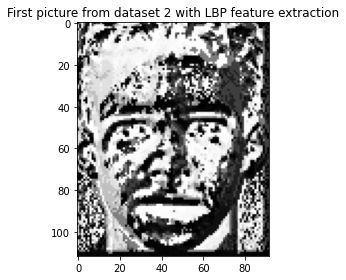

In [248]:
#Plot the first pictire from the dataset
plt.title("First picture from dataset 2 with LBP feature extraction")
imgplot = plt.imshow(lbp1)

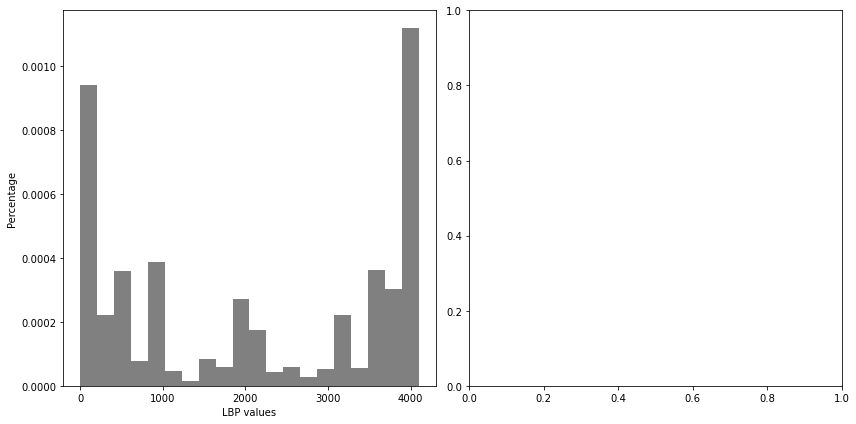

In [249]:
#Make the histogram of the pixels of the first image
#https://towardsdatascience.com/the-power-of-local-binary-patterns-3134178af1c7
def hist(axis, lbp):
    n_bins = int(lbp.max() + 1) # number of bins based on number of different values in lbp
    return axis.hist(lbp.ravel(), density=True, bins=20, range=(0, n_bins),
                   facecolor='0.5') # np.ravel() returns a flattened 1D array
  
# plot histograms of LBP of textures
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.gray()
ax1.set_ylabel('Percentage')
ax1.set_xlabel('LBP values')

hist(ax1, lbp1)

plt.show()

### Face Classification - SVM (Support Vector Machine)

https://www.kaggle.com/code/ashutoshvarma/image-classification-using-svm-92-accuracy/notebook

Size of each image: (112, 92) 10304


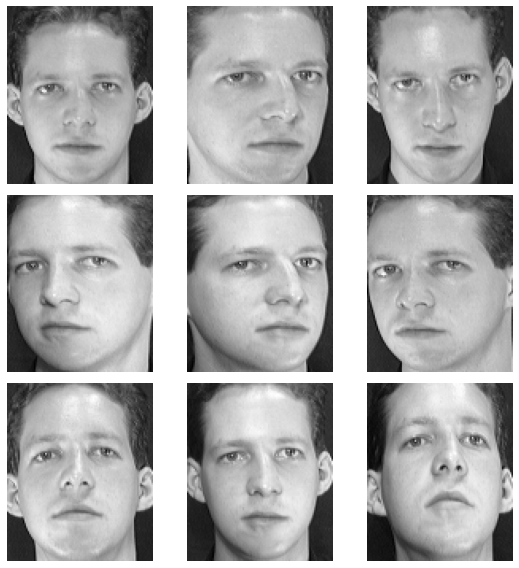

In [250]:
#Load all the images from the dataset s1
M=9
# loading only one image to get the dimensions
# you can use images .jpg and .ng as well
img = imread(path + '1.pgm', as_gray=True)

# get the number of rows (irow) and columns (icol). 
# these values must to be the same for all images
irow, icol = img.shape

# allocation of vector that will have all images
S = np.zeros((irow*icol, M)) # img matrix

plt.figure(figsize=(8,8))
for i in range(1,M+1):
    img = imread(path + '{}.pgm'.format(i), as_gray=True)
    
    plt.subplot(3,3,i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    # reshape(img',irow*icol,1); 
    # creates a (N1*N2)x1 vector
    temp = np.reshape(img, (irow*icol,1))
    S[:,i-1] = temp[:,0] 
# after finishing the sequence, S is a N1*N2xM matrix 

print('Size of each image:', img.shape, np.multiply(img.shape[0], img.shape[1]))

In [251]:
#Want to make sure we can read in all teh ATT dataset for s1
import os
for dirname, _, filenames in os.walk('ATT Dataset/s1'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [252]:
#More imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [253]:
#Create directory as well as the many categories of people we have
DATADIR = './ATT Dataset/'
CATEGORIES = ['s1', 's2', 's3', 's4', 's5', 's6','s7','s8','s9','s10',
             's11','s12','s13','s14','s15','s16','s17','s18','s19',
             's20','s21','s22','s23','s24','s25','s26','s27','s28',
             's29','s30','s31','s32','s33','s34','s35','s36','s37']
             
             
IMG_SIZE=100

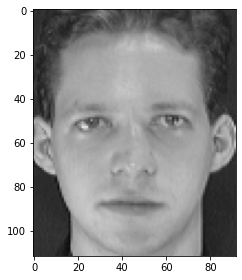

In [254]:
#we want to see the first image
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [255]:
#training data from sepcified path
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [256]:
lenofimage = len(training_data)

In [257]:
#split and append from categories and labels of the training data
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [258]:
#Flatten the image
X = X/255.0

In [259]:
y=np.array(y)

In [260]:
y.shape

(370,)

In [261]:
#split the data in train and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [262]:
from sklearn.svm import SVC
#classifier of SVM
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [263]:
#predict 
y2 = svc.predict(X_test)

In [264]:
from sklearn.metrics import accuracy_score
print("Accuracy of SVM on ATT dataset is",accuracy_score(y_test,y2))

Accuracy of SVM on ATT dataset is 0.967741935483871


In [265]:
from sklearn.metrics import classification_report
print("Accuracy on ATT dataset is",classification_report(y_test,y2))

Accuracy on ATT dataset is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         1


In [266]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [267]:
result

,original,predicted
0,22,22
1,6,6
2,3,3
3,30,30
4,10,10
...,...,...
88,19,19
89,36,36
90,13,13
91,36,36


### Face Classification MLP (Multi-layer Perceptron)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [268]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
acc = clf.score(X_test, y_test)
print("The accuracy of MLP classification classification is", acc)

The accuracy of MLP classification classification is 0.88


### Results from the Classifiers 

- The SVM classifier performed with a 96% accuracy
- The MLP classifier performed with 88% accuracy.